In [7]:
import pandas as pd

df = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/data/features_except_GDP2.xlsx')
data = df.describe()

In [9]:
df = pd.DataFrame(data)
df

,경상수지,실업률,청년실업율(15~29세),고용률,WTI유가,건설기성액(십억원),국내설비투자지수,국내소매판매액지수,국내전산업생산지수,달러인덱스,...,미국취업자수증감(만명),미국비농업고용자수,미국생산자물가지수,종합주택매매가격지수,소비자물가지수,소비자심리지수(CCSI),실업급여지급건수(월),전체임금총액(원),3년국채기준금리차,label
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.00000,129.000000,129.000000
mean,0.349684,0.002623,0.001098,0.000415,0.005670,0.003243,0.003725,0.001884,0.001921,0.001675,...,0.565953,0.001234,0.001792,0.001179,1.164784,0.000450,0.007600,0.00810,-9.493270,0.457364
std,3.882679,0.066090,0.070495,0.004016,0.129872,0.032976,0.044478,0.019653,0.010032,0.019299,...,4.216521,0.012746,0.010694,0.004041,14.726541,0.039432,0.109870,0.09518,111.822354,0.500121
min,-10.448616,-0.176471,-0.200000,-0.024390,-0.542400,-0.093642,-0.086079,-0.052114,-0.031853,-0.049569,...,-6.344697,-0.135701,-0.032241,-0.016948,-7.000000,-0.186735,-0.255157,-0.21750,-1269.000000,0.000000
25%,-0.356932,-0.033333,-0.038462,-0.001608,-0.059400,-0.016710,-0.025690,-0.009671,-0.005187,-0.013171,...,-0.394231,0.001102,-0.002722,0.000091,-0.001100,-0.017341,-0.071522,-0.04040,-0.284177,0.000000
50%,-0.034436,0.000000,0.000000,0.000000,0.003900,0.003883,0.003518,0.004082,0.002169,0.003044,...,0.000000,0.001575,0.002162,0.001160,0.001600,0.005753,-0.012507,-0.00720,-0.007735,0.000000
75%,0.284738,0.028571,0.046154,0.001686,0.063800,0.020435,0.026289,0.013321,0.008563,0.016566,...,0.576850,0.002075,0.006701,0.002853,0.003600,0.023398,0.068966,0.05190,0.158013,1.000000
max,35.358808,0.210526,0.188889,0.015228,0.883800,0.110926,0.141040,0.051867,0.028154,0.047999,...,44.400000,0.034689,0.034391,0.010394,166.900000,0.148699,0.411602,0.25510,34.614973,1.000000


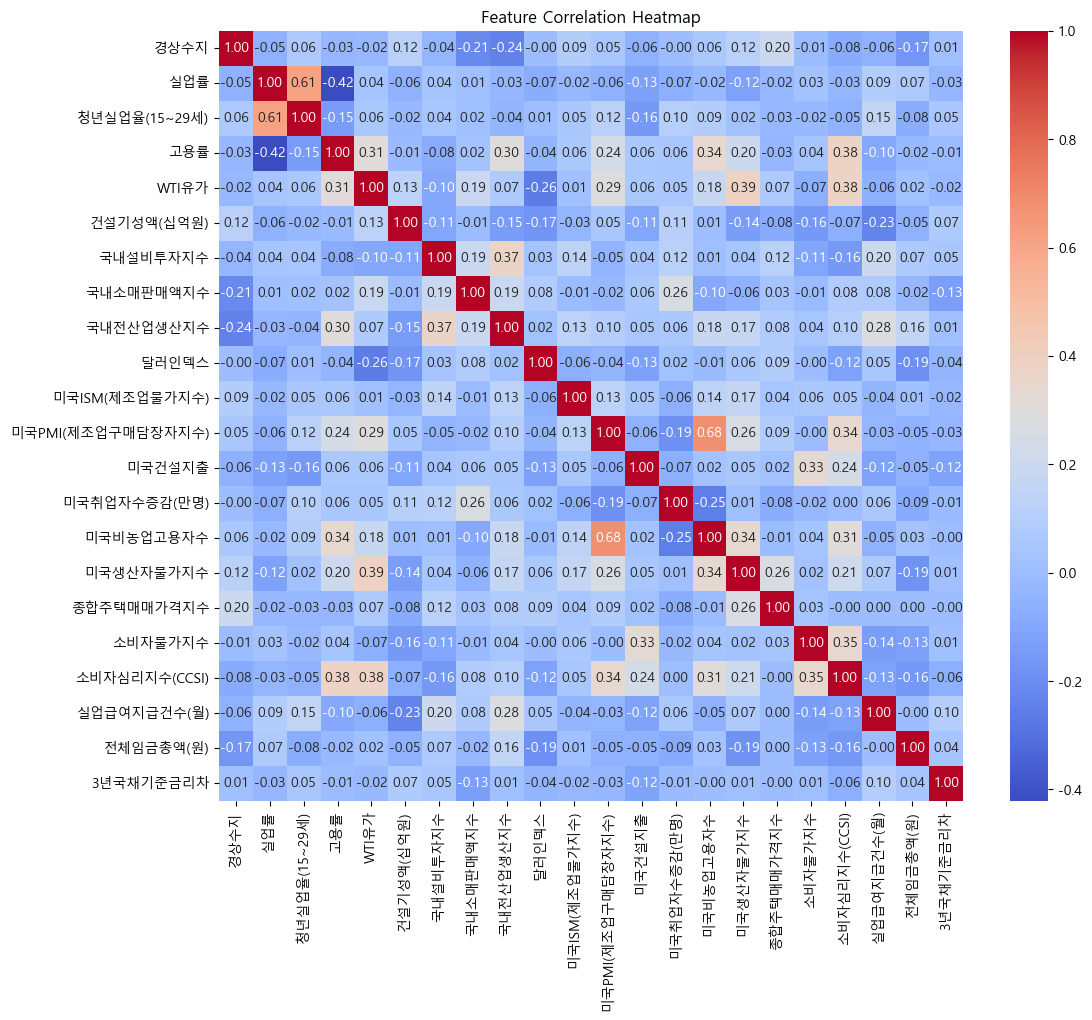

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# Removing '날짜' and 'label' columns from the dataset
df_features = df.drop(['날짜', 'label'], axis=1)

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()



In [5]:
# Create a dataframe from the correlation matrix, stack it, and reset index to make it easier to sort
corr_pairs = correlation_matrix.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlation pairs (where features are the same)
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]

# Calculate the absolute value of correlations to sort by
corr_pairs['Absolute Correlation'] = corr_pairs['Correlation'].abs()

# Sort the pairs by absolute correlation in descending order
sorted_corr_pairs = corr_pairs.sort_values(by='Absolute Correlation', ascending=False)

# Display the top correlated pairs
sorted_corr_pairs.head(10)


,Feature 1,Feature 2,Correlation,Absolute Correlation
319,미국비농업고용자수,미국PMI(제조업구매담장자지수),0.680536,0.680536
256,미국PMI(제조업구매담장자지수),미국비농업고용자수,0.680536,0.680536
45,청년실업율(15~29세),실업률,0.611868,0.611868
24,실업률,청년실업율(15~29세),0.611868,0.611868
25,실업률,고용률,-0.421146,0.421146
67,고용률,실업률,-0.421146,0.421146
334,미국생산자물가지수,WTI유가,0.392464,0.392464
103,WTI유가,미국생산자물가지수,0.392464,0.392464
399,소비자심리지수(CCSI),고용률,0.381159,0.381159
84,고용률,소비자심리지수(CCSI),0.381159,0.381159


In [6]:
# Reset the index of the top 10 sorted correlation pairs for a clean view
top_corr_pairs_reset_index = sorted_corr_pairs.head(10).reset_index(drop=True)
top_corr_pairs_reset_index

,Feature 1,Feature 2,Correlation,Absolute Correlation
0,미국비농업고용자수,미국PMI(제조업구매담장자지수),0.680536,0.680536
1,미국PMI(제조업구매담장자지수),미국비농업고용자수,0.680536,0.680536
2,청년실업율(15~29세),실업률,0.611868,0.611868
3,실업률,청년실업율(15~29세),0.611868,0.611868
4,실업률,고용률,-0.421146,0.421146
5,고용률,실업률,-0.421146,0.421146
6,미국생산자물가지수,WTI유가,0.392464,0.392464
7,WTI유가,미국생산자물가지수,0.392464,0.392464
8,소비자심리지수(CCSI),고용률,0.381159,0.381159
9,고용률,소비자심리지수(CCSI),0.381159,0.381159
